# EXPLORATORY DATA ANALYSIS (EDA) - OVERVIEW & PANDAS FUNCTIONS

EDA is a critical step in the data science process that helps us understand our dataset 
before applying machine learning algorithms or statistical models.

KEY OBJECTIVES OF EDA:
1. Understand the structure and characteristics of the data
2. Identify missing values, outliers, and data quality issues
3. Discover patterns, trends, and relationships in the data
4. Generate hypotheses for further analysis
5. Inform data preprocessing and feature engineering decisions

ESSENTIAL PANDAS FUNCTIONS FOR EDA:

1. DATA OVERVIEW:
    - df.head() / df.head(n)     → View first n rows (default 5)
    - df.tail() / df.tail(n)     → View last n rows (default 5)
    - df.sample(n)               → View n random rows
    - df.shape                   → Get dimensions (rows, columns)
    - df.columns                 → List all column names
    - df.info()                  → Data types, memory usage, non-null counts
    - df.dtypes                  → Data types of each column

2. STATISTICAL SUMMARY:
    - df.describe()              → Summary statistics for numerical columns
    - df.describe(include='all') → Summary statistics for all columns
    - df.nunique()               → Count unique values per column
    - df.value_counts()          → Frequency count of unique values

3. DATA QUALITY ASSESSMENT:
    - df.isnull().sum()          → Count missing values per column
    - df.isna().sum()            → Alternative to isnull()
    - df.duplicated().sum()      → Count duplicate rows
    - df.drop_duplicates()       → Remove duplicate rows

4. DATA EXPLORATION:
    - df.groupby().agg()         → Group data and apply aggregations
    - df.corr()                  → Correlation matrix for numerical columns
    - df.crosstab()              → Cross-tabulation for categorical variables
    - df.pivot_table()           → Create pivot tables

5. DATA VISUALIZATION (with pandas plotting):
    - df.plot()                  → Basic line plot
    - df.hist()                  → Histograms for all numerical columns
    - df.boxplot()               → Box plots for outlier detection
    - df.plot.scatter()          → Scatter plots for relationships

CURRENT DATASET INSIGHTS:
- Dataset contains 525 rows and 18 columns
- Multiple data types: numerical (Age, Purchase Amount, etc.) and categorical (Gender, Category, etc.)
- Significant missing values across most columns (ranging from 8-48 missing values per column)
- Mixed case inconsistencies in Gender column ('Male', 'female', 'Female')
- Some critical columns like Customer ID have missing values (39 missing)
"""

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df: pd.DataFrame = pd.read_csv('customer_purchase_dataset.csv')

In [2]:
# View first 5 rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,CUST0001,40.0,female,Pants,Clothing,220.66,New York,XL,Red,Fall,3.0,Yes,Same-Day,Yes,Yes,2.0,Credit Card,Weekly
1,CUST0002,33.0,Female,Pants,Clothing,214.51,Houston,XL,Black,Spring,3.0,No,Same-Day,No,No,0.0,Apple Pay,Monthly
2,CUST0003,42.0,Female,Shoes,Footwear,176.53,New York,S,White,Winter,2.0,Yes,Standard,No,Yes,6.0,Debit Card,Fortnightly
3,CUST0004,53.0,Male,Dress,Clothing,128.40,Los Angeles,XL,Red,Spring,4.0,Yes,Standard,Yes,No,10.0,Google Pay,Weekly
4,CUST0005,32.0,Female,Dress,Clothing,187.68,Miami,S,Red,Spring,4.0,Yes,Express,Yes,No,4.0,Apple Pay,Weekly


In [3]:
# View random 5 rows
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
274,CUST0275,23.0,Female,Jacket,Clothing,116.46,Miami,XL,Green,Winter,5.0,Yes,Same-Day,No,No,6.0,Apple Pay,Monthly
492,CUST0493,35.0,Female,Shoes,Footwear,66.41,Miami,L,White,Fall,4.0,Yes,Standard,No,Yes,4.0,Google Pay,Weekly
88,CUST0089,28.0,Female,Dress,Clothing,215.53,New York,XL,Yellow,Fall,4.0,No,Same-Day,No,No,6.0,Apple Pay,Fortnightly
264,CUST0265,31.0,Female,Pants,Clothing,28.63,New York,M,White,Fall,4.0,Yes,Same-Day,No,Yes,1.0,Credit Card,Fortnightly
250,CUST0251,19.0,Male,Dress,NaN,88.30,Miami,M,Green,Spring,4.0,No,Express,No,Yes,9.0,Debit Card,Weekly


In [4]:
# View last 5 rows
df.tail(5) 

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
520,CUST0043,33.0,Female,Pants,NaN,114.67,Chicago,M,Red,Spring,4.0,No,Express,No,Yes,5.0,Debit Card,Fortnightly
521,CUST0323,25.0,Male,Bag,Accessories,125.49,Houston,L,Red,Winter,1.0,Yes,Same-Day,No,Yes,0.0,Credit Card,Monthly
522,CUST0206,23.0,Male,Bag,Accessories,233.40,Houston,S,Yellow,Winter,4.0,No,Express,Yes,No,9.0,Credit Card,Weekly
523,CUST0399,33.0,Female,Dress,Clothing,92.27,Chicago,L,Yellow,Summer,Five,Yes,Same-Day,No,Yes,0.0,Apple Pay,Fortnightly
524,CUST0385,25.0,Male,Bag,Accessories,204.43,Los Angeles,XL,Green,Summer,3.0,Yes,Same-Day,No,No,7.0,Debit Card,Weekly


In [5]:
# Row and column count
df.shape

(525, 18)

In [6]:
# Show columns
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [7]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             517 non-null    object 
 1   Age                     516 non-null    float64
 2   Gender                  522 non-null    object 
 3   Item Purchased          523 non-null    object 
 4   Category                515 non-null    object 
 5   Purchase Amount (USD)   518 non-null    float64
 6   Location                524 non-null    object 
 7   Size                    522 non-null    object 
 8   Color                   524 non-null    object 
 9   Season                  518 non-null    object 
 10  Review Rating           519 non-null    object 
 11  Subscription Status     520 non-null    object 
 12  Shipping Type           517 non-null    object 
 13  Discount Applied        516 non-null    object 
 14  Promo Code Used         518 non-null    ob

In [8]:
# Summary statistics
df.describe()
# df.describe(include='all')

# include = 'all' to include categorical columns as well otherwise only numerical columns are considered

,Age,Purchase Amount (USD),Previous Purchases
count,516.000000,518.000000,521.000000
mean,34.813953,150.769459,5.040307
std,10.981373,88.616482,2.947670
min,18.000000,-241.380000,0.000000
25%,26.000000,98.610000,3.000000
50%,35.000000,153.100000,5.000000
75%,42.000000,210.312500,7.000000
max,65.000000,382.870000,14.000000


In [9]:
# Checking for null values
df.isnull().sum()

Customer ID                8
Age                        9
Gender                     3
Item Purchased             2
Category                  10
Purchase Amount (USD)      7
Location                   1
Size                       3
Color                      1
Season                     7
Review Rating              6
Subscription Status        5
Shipping Type              8
Discount Applied           9
Promo Code Used            7
Previous Purchases         4
Payment Method            10
Frequency of Purchases     2
dtype: int64

In [10]:
# Checking for duplicate rows
df.duplicated().sum()

np.int64(25)

# Data Cleaning

In [11]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
# Remove all records with any column having null values
df.dropna(inplace=True)
df.isnull().sum()
df.shape

(421, 18)

In [14]:
# Categorical Data Analysis
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("\n")

Column: Customer ID
Customer ID
CUST0001    1
CUST0002    1
CUST0003    1
CUST0004    1
CUST0005    1
           ..
CUST0495    1
CUST0496    1
CUST0498    1
CUST0499    1
CUST0500    1
Name: count, Length: 421, dtype: int64


Column: Gender
Gender
Male      215
Female    193
female      8
male        5
Name: count, dtype: int64


Column: Item Purchased
Item Purchased
Pants     78
Jacket    77
Shoes     76
Bag       67
Shirt     67
Dress     56
Name: count, dtype: int64


Column: Category
Category
Clothing       273
Footwear        76
Accessories     65
Unknown          7
Name: count, dtype: int64


Column: Location
Location
Houston          93
New York         88
Chicago          78
Miami            76
Los Angeles      74
Chicago           3
Los Angeles       3
Houston           2
New York          2
Miami             2
Name: count, dtype: int64


Column: Size
Size
S     117
L     113
XL    102
M      89
Name: count, dtype: int64


Column: Color
Color
Blue      72
Yellow    71
Black  

In [15]:
# Ensure same casing for all categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.title()
    # print(df[col].value_counts())

In [16]:
# Strip leading/trailing spaces
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()
    # print(df[col].value_counts())

In [17]:
# Remove typo in Yess for Yes in 'Subscription Status' column
df['Subscription Status'] = df['Subscription Status'].replace("Yess", "Yes")
df['Subscription Status'].value_counts()

Subscription Status
No     211
Yes    210
Name: count, dtype: int64

In [18]:
df['Review Rating'].dtype

dtype('O')

In [19]:
df['Review Rating'] = df['Review Rating'].replace("Five", 5)

# Convert to float
df['Review Rating'] = pd.to_numeric(df['Review Rating'], errors='coerce')
df['Review Rating'].dtype

dtype('float64')

In [20]:
df['Purchase Amount (USD)'].describe()

count    421.000000
mean     148.247815
std       89.212801
min     -241.380000
25%       96.100000
50%      152.940000
75%      207.590000
max      382.870000
Name: Purchase Amount (USD), dtype: float64

In [21]:
# Remove purchase amounts with negative values
df = df[df['Purchase Amount (USD)'] >= 0]
df['Purchase Amount (USD)'].describe()

count    412.000000
mean     154.784636
std       77.723831
min       10.000000
25%      103.607500
50%      155.110000
75%      209.597500
max      382.870000
Name: Purchase Amount (USD), dtype: float64

# Descriptive statistics after cleaning

In [22]:
# Measures of Central Tendency
mean_purchase = df.select_dtypes(include=['float64', 'int64']).mean()
median_purchase = df.select_dtypes(include=['float64', 'int64']).median()
mode_purchase = df.select_dtypes(include=['float64', 'int64']).mode().iloc[0]

print(f"Mean: {mean_purchase}")
print(f"Median: {median_purchase}")
print(f"Mode: {mode_purchase}")

Mean: Age                       34.883495
Purchase Amount (USD)    154.784636
Review Rating              3.492718
Previous Purchases         5.133495
dtype: float64
Median: Age                       35.00
Purchase Amount (USD)    155.11
Review Rating              4.00
Previous Purchases         5.00
dtype: float64
Mode: Age                      18.0
Purchase Amount (USD)    10.0
Review Rating             3.0
Previous Purchases        7.0
Name: 0, dtype: float64


In [23]:
# Measures of spread

std_dev = df.select_dtypes(include=['float64', 'int64']).std()
variance = df.select_dtypes(include=['float64', 'int64']).var()
range_v = df.select_dtypes(include=['float64', 'int64']).max() - df.select_dtypes(include=['float64', 'int64']).min()
Q1 = df.select_dtypes(include=['float64', 'int64']).quantile(0.25)
Q3 = df.select_dtypes(include=['float64', 'int64']).quantile(0.75)
IQR = Q3 - Q1

print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")
print(f"Range: {range_v}")
print(f"IQR: {IQR}")

Standard Deviation: Age                      10.989091
Purchase Amount (USD)    77.723831
Review Rating             0.990193
Previous Purchases        2.947083
dtype: float64
Variance: Age                       120.760116
Purchase Amount (USD)    6040.993851
Review Rating               0.980482
Previous Purchases          8.685299
dtype: float64
Range: Age                       47.00
Purchase Amount (USD)    372.87
Review Rating              4.00
Previous Purchases        14.00
dtype: float64
IQR: Age                       16.00
Purchase Amount (USD)    105.99
Review Rating              1.00
Previous Purchases         4.00
dtype: float64


## Data Visualization and Plotting

Data visualization is a crucial component of exploratory data analysis that helps us understand patterns, distributions, and relationships in our dataset through graphical representations.

### Why Plotting is Important in EDA:
1. **Pattern Recognition**: Visual patterns are easier to identify than numerical summaries
2. **Outlier Detection**: Extreme values stand out clearly in plots
3. **Distribution Understanding**: Shape, skewness, and spread become apparent
4. **Relationship Discovery**: Correlations and associations between variables
5. **Data Quality Assessment**: Missing values and inconsistencies are visible

### Common Plot Types for Different Data Types:

**Numerical Data:**
- **Histograms**: Show distribution shape and frequency
- **Box Plots**: Display quartiles, median, and outliers
- **Density Plots (KDE)**: Smooth distribution curves
- **Scatter Plots**: Relationships between two numerical variables
- **Line Plots**: Time series or ordered data trends

**Categorical Data:**
- **Bar Charts**: Frequency of categories
- **Pie Charts**: Proportions of categories
- **Count Plots**: Similar to bar charts with seaborn

**Mixed Data Types:**
- **Violin Plots**: Combine box plots with density plots
- **Heatmaps**: Correlation matrices or cross-tabulations
- **Pair Plots**: Multiple scatter plots for all variable combinations

### Key Plotting Libraries:
- **Matplotlib**: Foundation plotting library with fine control
- **Seaborn**: Statistical plotting with attractive defaults
- **Pandas Plotting**: Quick plots directly from DataFrames
- **Plotly**: Interactive visualizations

### Statistical Information in Plots:
Our current dataset analysis shows:
- **Mean vs Median**: Close values suggest relatively normal distributions
- **Skewness**: Most variables show slight right-skew (positive values)
- **IQR**: Interquartile ranges help identify outliers in box plots
- **Standard Deviation**: Indicates spread around the mean

The following cells will demonstrate various plotting techniques to visualize our customer purchase dataset effectively.

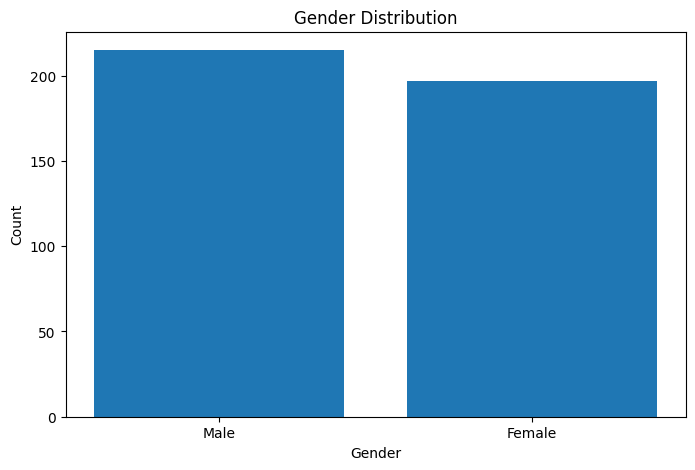

In [24]:
# Simple bar chart for Gender column
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.bar(df['Gender'].value_counts().index, df['Gender'].value_counts().values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


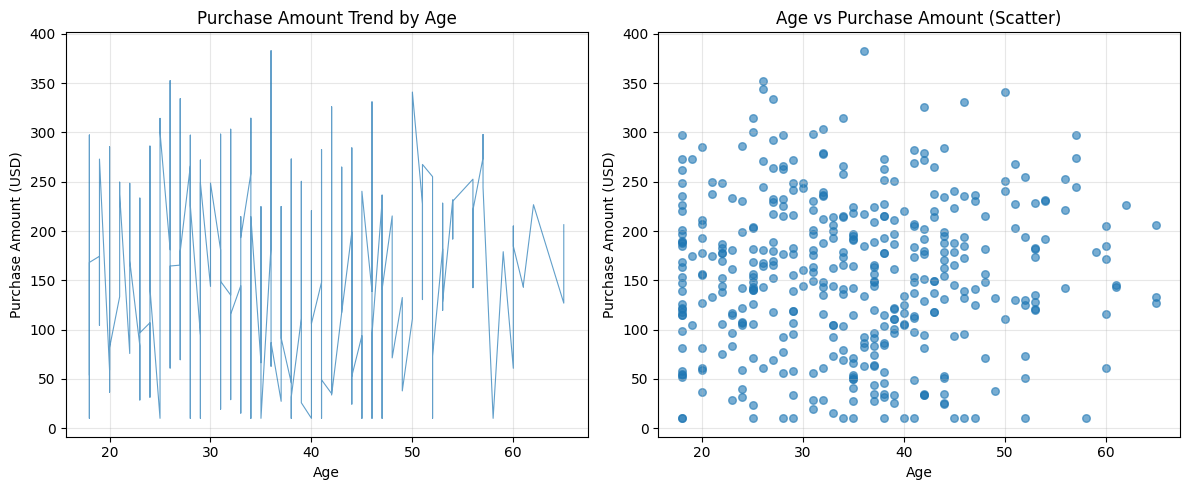

In [25]:
# Simple line graph - Age trend (sorted by age)
plt.figure(figsize=(12, 5))

# Subplot 1: Line graph
plt.subplot(1, 2, 1)
df_sorted = df.sort_values('Age')
plt.plot(df_sorted['Age'], df_sorted['Purchase Amount (USD)'], linewidth=0.8, alpha=0.7)
plt.title('Purchase Amount Trend by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True, alpha=0.3)

# Subplot 2: Scatter plot
plt.subplot(1, 2, 2)
plt.scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.6, s=30)
plt.title('Age vs Purchase Amount (Scatter)')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

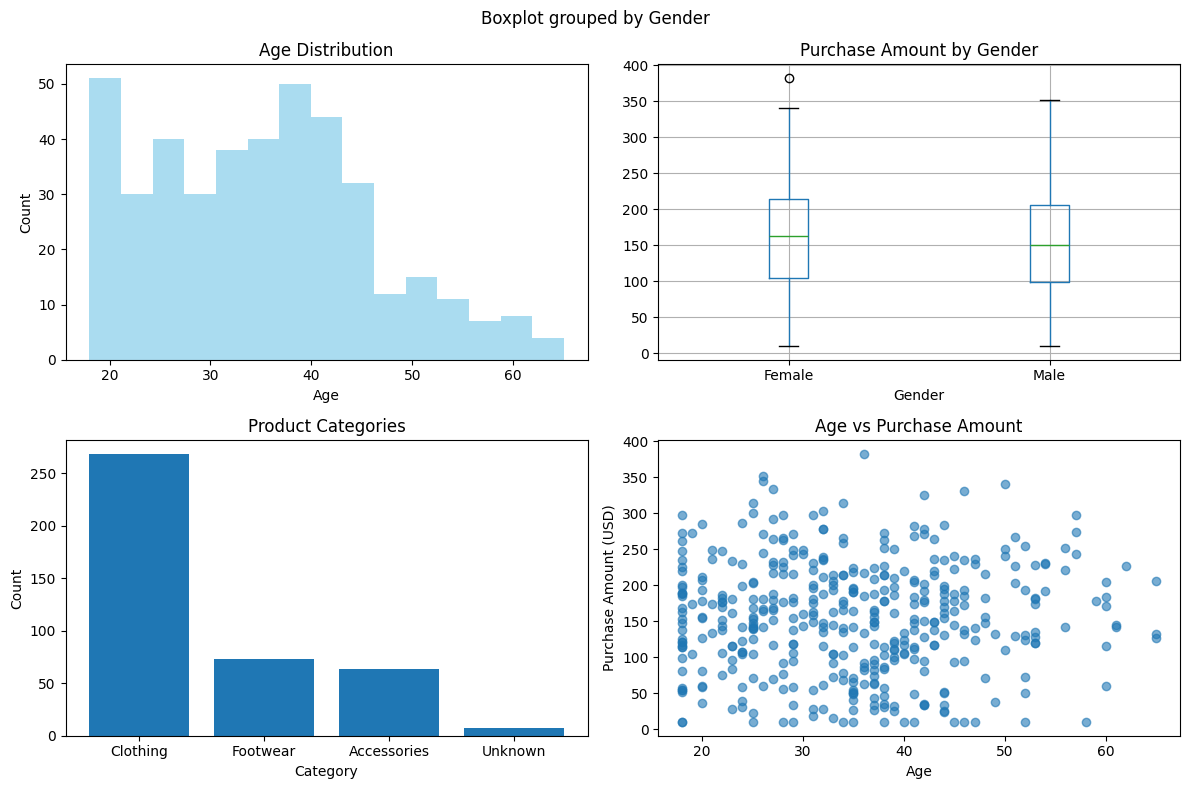

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set basic style
plt.style.use('default')

# Create simple plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Simple Data Visualizations', fontsize=14)

# 1. Age histogram
axes[0, 0].hist(df['Age'], bins=15, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# 2. Purchase amount by gender
df.boxplot(column='Purchase Amount (USD)', by='Gender', ax=axes[0, 1])
axes[0, 1].set_title('Purchase Amount by Gender')

# 3. Category counts
category_counts = df['Category'].value_counts()
axes[1, 0].bar(category_counts.index, category_counts.values)
axes[1, 0].set_title('Product Categories')
axes[1, 0].set_xlabel('Category')
axes[1, 0].set_ylabel('Count')

# 4. Age vs Purchase Amount
axes[1, 1].scatter(df['Age'], df['Purchase Amount (USD)'], alpha=0.6)
axes[1, 1].set_title('Age vs Purchase Amount')
axes[1, 1].set_xlabel('Age')
axes[1, 1].set_ylabel('Purchase Amount (USD)')

plt.tight_layout()
plt.show()


In [30]:
# Some plots using plotly

import plotly.express as px
import plotly.graph_objects as go
# Histogram of Age
fig = px.histogram(df, x='Age', nbins=15, title='Age Distribution')
fig.show()

# Line plot of Purchase Amount over Age
fig = px.line(df.sort_values('Age'), x='Age', y='Purchase Amount (USD)', title='Purchase Amount Trend by Age')
fig.show()


In [28]:
# Distribution Shapes (skewness and kurtosis)

# https://www.datacamp.com/tutorial/understanding-skewness-and-kurtosis

# What is skewness and kurtosis?
# Skewness measures the asymmetry of the data distribution. A skewness value > 0 indicates a right-skewed distribution, while a value < 0 indicates a left-skewed distribution.
# Kurtosis measures the "tailedness" of the data distribution. A kurtosis value > 3 indicates a distribution with heavier tails than a normal distribution, while a value < 3 indicates lighter tails.  


skewness = df.select_dtypes(include=['float64', 'int64']).skew()
kurtosis = df.select_dtypes(include=['float64', 'int64']).kurtosis()

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurtosis}")


Skewness: Age                      0.378972
Purchase Amount (USD)    0.070217
Review Rating           -0.236589
Previous Purchases       0.187833
dtype: float64
Kurtosis: Age                     -0.406935
Purchase Amount (USD)   -0.487584
Review Rating           -0.420790
Previous Purchases      -0.433930
dtype: float64


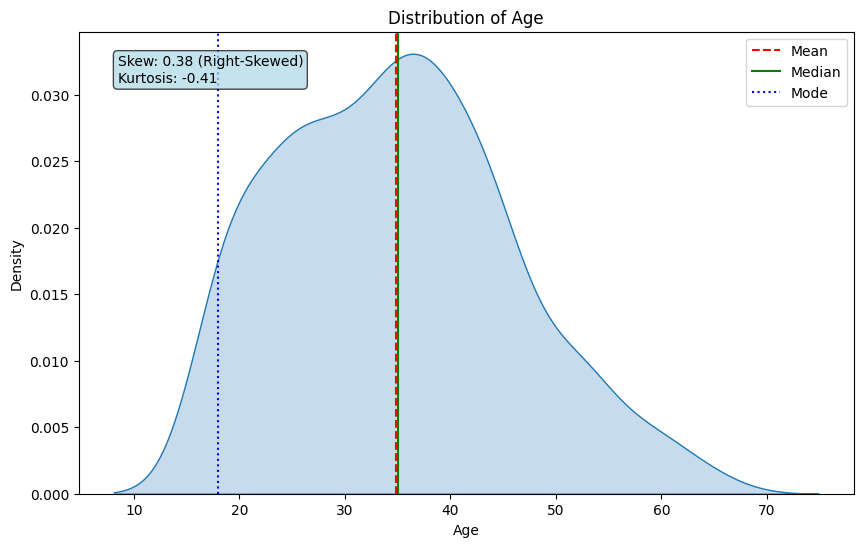

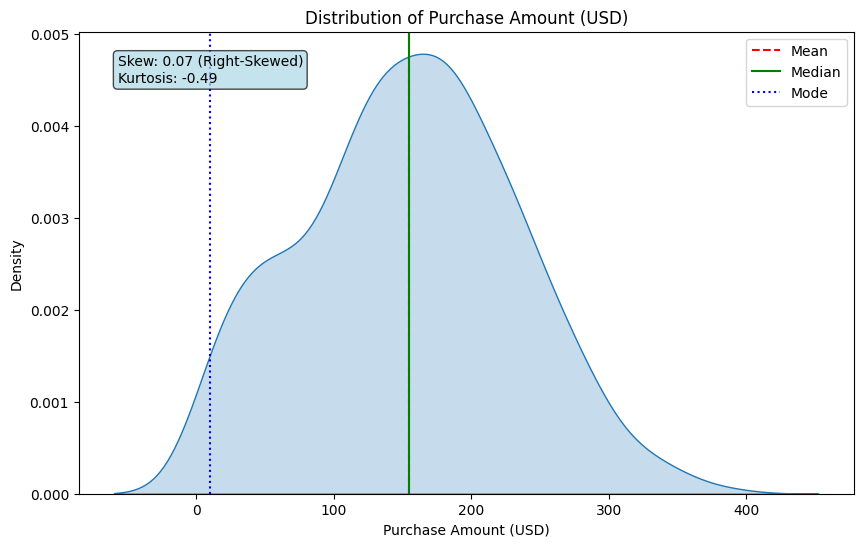

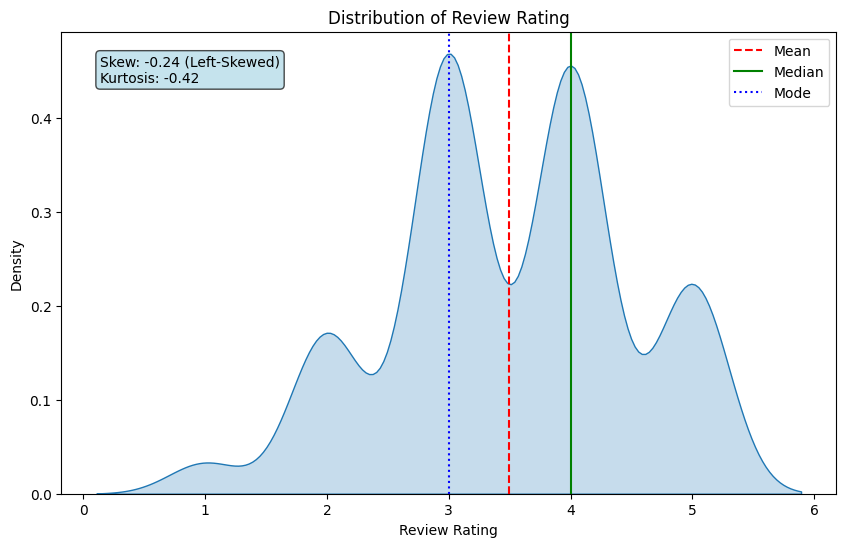

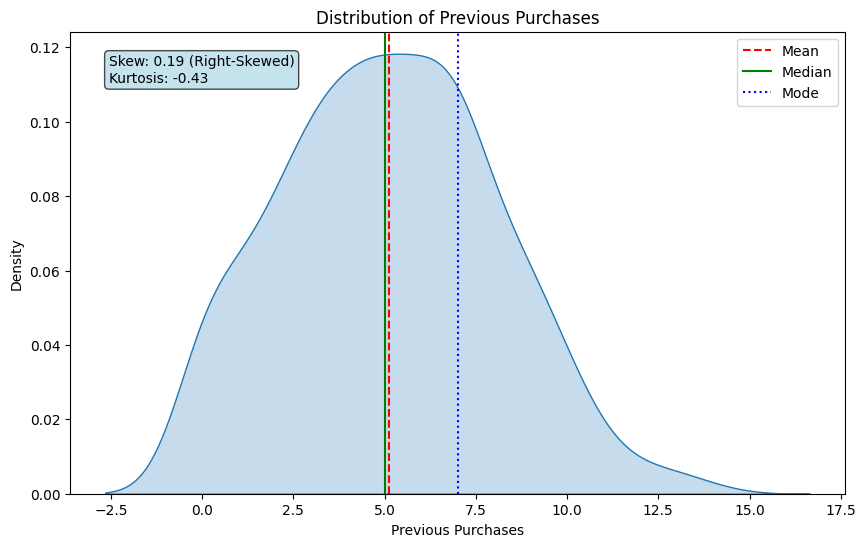

In [29]:
# Plot the kde plots to visualize the distribution with mean, median and mode markers
# Also mention the kind of distribution (normal, left-skewed, right-skewed, etc.)

import matplotlib.pyplot as plt
import seaborn as sns


for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[col], fill=True)
    plt.axvline(mean_purchase[col], color='r', linestyle='--', label='Mean')
    plt.axvline(median_purchase[col], color='g', linestyle='-', label='Median')
    plt.axvline(mode_purchase[col], color='b', linestyle=':', label='Mode')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    if skewness[col] > 0:
        skew_type = "Right-Skewed"
    elif skewness[col] < 0:
        skew_type = "Left-Skewed"
    else:
        skew_type = "Symmetric"
    plt.text(0.05, 0.95, f'Skew: {skewness[col]:.2f} ({skew_type})\nKurtosis: {kurtosis[col]:.2f}', 
             transform=plt.gca().transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.7))

    # transform=plt.gca().transAxes to place text in axes coordinates
    # It works by transforming the coordinates of the text box from data coordinates to axes coordinates, allowing for consistent placement regardless of the data range.
    plt.legend()
    plt.show()


# Hypothesis Testing

## Hypothesis Testing

Hypothesis testing is a statistical method used to make inferences or draw conclusions about a population based on a sample of data. It involves formulating a null hypothesis (H₀) and an alternative hypothesis (H₁), collecting data, and using statistical tests to determine whether to reject or fail to reject the null hypothesis.

### Key Concepts

**Null Hypothesis (H₀):**
- A statement that there is no effect or no difference between groups or variables
- Serves as a starting point for statistical testing
- Typically assumed to be true until evidence suggests otherwise

**Alternative Hypothesis (H₁):**
- A statement that contradicts the null hypothesis
- Suggests that there is an effect or a difference between groups or variables
- Represents the research hypothesis that the researcher aims to support through data analysis

### Example Hypothesis Test

**Null Hypothesis (H₀):** The average purchase amount for customers with a subscription is equal to the average purchase amount for customers without a subscription.

**Alternative Hypothesis (H₁):** The average purchase amount for customers with a subscription is different from the average purchase amount for customers without a subscription.

### Statistical Significance
- **p-value**: Probability of observing the test results under the assumption that the null hypothesis is correct
- **Significance level (α)**: Threshold for determining statistical significance (commonly 0.05)
- **Decision rule**: If p-value < α, reject H₀; otherwise, fail to reject H₀

## T-Test Theory and Explanation

The **t-test** is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. It's one of the most commonly used statistical tests in data analysis and research.

### What is a T-Test?

A t-test compares the means of two groups to determine whether they are statistically different from each other. It uses the t-distribution, which is similar to the normal distribution but accounts for the uncertainty that comes with smaller sample sizes.

### Types of T-Tests

**1. One-Sample T-Test:**
- Compares a sample mean to a known population mean
- Example: Is the average age of our customers significantly different from 30 years?

**2. Independent Two-Sample T-Test (Unpaired):**
- Compares the means of two independent groups
- Example: Is there a difference in purchase amounts between subscribers and non-subscribers?

**3. Paired T-Test (Dependent):**
- Compares means from the same subjects at different times
- Example: Customer satisfaction before and after a service improvement

### Key Components of T-Test

**T-Statistic Formula:**
```
t = (mean₁ - mean₂) / (pooled standard error)
```

**Degrees of Freedom (df):**
- For independent t-test: df = n₁ + n₂ - 2
- Where n₁ and n₂ are the sample sizes of the two groups

**P-Value:**
- Probability of observing the test results under the null hypothesis
- If p-value < α (significance level), reject the null hypothesis

### Assumptions of T-Test

1. **Independence:** Observations must be independent of each other
2. **Normality:** Data should be approximately normally distributed
3. **Equal Variances:** Both groups should have similar variances (for independent t-test)
4. **Continuous Data:** The dependent variable should be continuous

### Interpretation

**Statistical Significance:**
- **p-value < 0.05:** Statistically significant difference (reject H₀)
- **p-value ≥ 0.05:** No statistically significant difference (fail to reject H₀)

**Effect Size:**
- A large t-statistic (positive or negative) indicates a larger difference between groups
- The magnitude tells us about practical significance, not just statistical significance

### Example from Our Analysis

In our customer dataset analysis:
- **Groups:** Customers with subscription vs. without subscription
- **Variable:** Purchase Amount (USD)
- **T-statistic:** 0.0019 (very small)
- **P-value:** 0.9985 (very high)
- **Conclusion:** No statistically significant difference in purchase amounts between the two groups

### When to Use T-Test vs Other Tests

**Use T-Test when:**
- Comparing means of continuous variables
- Sample size is relatively small (< 30) or population standard deviation is unknown
- Data meets the assumptions listed above

**Consider alternatives when:**
- Data is not normally distributed → Use Mann-Whitney U test
- Comparing more than two groups → Use ANOVA
- Large sample sizes → Z-test might be appropriate

In [ ]:
# Hypothesis Testing Example

# Null Hypothesis (H0): There is no significant difference in average purchase amount between customers with and without a subscription.
# Alternative Hypothesis (H1): There is a significant difference in average purchase amount between customers with and without a subscription.

from scipy import stats
# Separate the data into two groups
group_with_subscription = df[df['Subscription Status'] == 'Yes']['Purchase Amount (USD)']
group_without_subscription = df[df['Subscription Status'] == 'No']['Purchase Amount (USD)']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group_with_subscription, group_without_subscription)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis.")
    # This suggests that there could be a significant difference in average purchase amounts between the two groups.
else:
    print("Fail to reject the null hypothesis.")
    # This suggests that there is no significant difference in average purchase amounts between the two groups.


T-statistic: 0.001879455851750296, P-value: 0.9985013261814317
Fail to reject the null hypothesis.
